In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(
    [["this bottle is fruity"],
    ["this bottle is tropical"]],
    columns=["description"]
)

In [3]:
df

,description
0,this bottle is fruity
1,this bottle is tropical


In [9]:
def func(row):
    row["fruity"] = "fruity" in row.description
    row["tropical"] = "tropical" in row.description
    return row

df.apply(func, axis="columns")

,description,fruity,tropical
0,this bottle is fruity,True,False
1,this bottle is tropical,False,True


In [10]:
heart = pd.read_csv("heart.csv")

In [11]:
heart.shape

(918, 12)

In [13]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,NaN,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,NaN,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
heart.groupby("Sex").Age.mean()

Sex
F    52.510417
M    53.781768
Name: Age, dtype: float64

In [15]:
heart.groupby("Sex")

In [16]:
list(heart.groupby("Sex"))

[('F',
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
  1     NaN   F           NAP        160          180          0     Normal   
  3    48.0   F           ASY        138          214          0     Normal   
  6    45.0   F           ATA        130          237          0     Normal   
  9    48.0   F           ATA        120          284          0     Normal   
  10   37.0   F           NAP        130          211          0     Normal   
  ..    ...  ..           ...        ...          ...        ...        ...   
  901  58.0   F           ASY        170          225          1        LVH   
  906  55.0   F           ATA        132          342          0     Normal   
  909  63.0   F           ASY        124          197          0     Normal   
  912  57.0   F           ASY        140          241          0     Normal   
  916  57.0   F           ATA        130          236          0        LVH   
  
       MaxHR ExerciseAngina  Oldpeak ST_Sl

In [24]:
list(heart.groupby("Sex"))[1][1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,NaN,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59.0,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [32]:
heart.groupby("Sex").Age.count()

Sex
F    192
M    724
Name: Age, dtype: int64

In [41]:
heart.groupby("Sex").Age.agg([len])

,len
Sex,
F,193
M,725


In [38]:
heart.groupby("Sex").mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.510417,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.781768,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


<AxesSubplot:xlabel='Sex'>

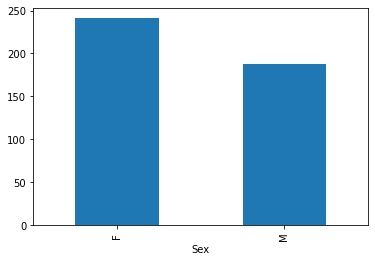

In [39]:
heart.groupby("Sex").Cholesterol.mean().plot(kind="bar")

In [42]:
heart.groupby(["Sex", "ChestPainType"]).mean()

Age   RestingBP  Cholesterol  FastingBS       MaxHR  \
Sex ChestPainType                                                              
F   ASY            54.257143  136.242857   235.200000   0.200000  139.128571   
    ATA            49.583333  128.650000   249.350000   0.083333  152.366667   
    NAP            53.211538  129.264151   245.603774   0.094340  148.528302   
    TA             54.200000  141.000000   210.900000   0.200000  145.200000   
M   ASY            55.075117  132.734742   178.666667   0.298122  126.727700   
    ATA            49.061947  131.672566   224.389381   0.123894  149.061947   
    NAP            53.369128  131.560000   180.420000   0.240000  141.366667   
    TA             55.000000  135.138889   206.000000   0.305556  148.638889   

                    Oldpeak  HeartDisease  
Sex ChestPainType                          
F   ASY            1.154286      0.557143  
    ATA            0.315000      0.066667  
    NAP            0.416981      0.113208  
    TA             0.730000      0.100000  
M   ASY            1.164085      0.828638  
    ATA            0.303540      0.176991  
    NAP            0.766000      0.440000  
    TA             1.122222      0.527778

In [49]:
heart.groupby(["Sex", "ChestPainType"]).mean().index

MultiIndex([('F', 'ASY'),
            ('F', 'ATA'),
            ('F', 'NAP'),
            ('F',  'TA'),
            ('M', 'ASY'),
            ('M', 'ATA'),
            ('M', 'NAP'),
            ('M',  'TA')],
           names=['Sex', 'ChestPainType'])

In [50]:
heart.index

RangeIndex(start=0, stop=918, step=1)

In [51]:
type(heart.groupby(["Sex", "ChestPainType"]).mean().index)

pandas.core.indexes.multi.MultiIndex

In [58]:
def func(df):
    return df.Cholesterol.iloc[0]
    
heart.groupby("Sex").apply(func)

Sex
F    180
M    289
dtype: int64

In [59]:
def func(df):
    return df.loc[df.Age.idxmax()]
    
heart.groupby("Sex").apply(func)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,,
F,76.0,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
M,77.0,M,ASY,124,171,0,ST,110,Y,2.0,Up,1


In [60]:
heart.loc[heart.Sex == 'F'].Age.max()

76.0

In [61]:
heart.loc[heart.Sex == 'M'].Age.max()

77.0

In [70]:
def mysum(s):
    return s.sum()
heart.groupby("Sex").Age.agg([min, max, "mean", len, "count", sum, mysum])

,min,max,mean,len,count,sum,mysum
Sex,,,,,,,
F,30.0,76.0,52.510417,193,192,10082.0,10082.0
M,28.0,77.0,53.781768,725,724,38938.0,38938.0


In [75]:
heart.sort_values(["Sex", "Age"], ascending=[True, False])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
688,76.0,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
619,74.0,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0
375,73.0,F,NAP,160,0,0,ST,121,N,0.0,Up,1
630,71.0,F,ASY,112,149,0,Normal,125,N,1.6,Flat,0
644,71.0,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170,29.0,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
219,29.0,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
829,29.0,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
208,28.0,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
